## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path('./Resources/bitstamp.csv'), 
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path('./Resources/coinbase.csv'), 
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp=bitstamp.dropna()
display(bitstamp.head())
bitstamp.isnull().sum()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [7]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "")

C:\Users\niklo\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


### Step 3: Convert the data type of the Close column to a `float`.

In [8]:
# Convert the Close data type to a float
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].astype("float")
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [9]:
# Review the data for duplicate values, and drop them if necessary
display(bitstamp.tail())
bitstamp.isnull().sum()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106
2018-03-31 23:58:00,6927.65,6929.42,6927.65,6927.65,0.839507,5817.007705,6929.080007
2018-03-31 23:59:00,6929.98,6929.98,6928.00,6928.01,0.209363,1450.735763,6929.289993


Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [10]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase=coinbase.dropna() #drop blanks or NAs
display(coinbase.head(10)) # show top 10 rows of data to make sure it looks ok
coinbase.isnull().sum() #check if we still have any missing or NA data in dataframe

#Need to do same $ sign removal from the close column and then parse into a float
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$", "")
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].astype("float")
coinbase.dtypes #Confirm datatype is now a float

#Do one last check to make sure data still looks ok and there are no blanks or NAs in the data
display(bitstamp.tail(10))
bitstamp.isnull().sum()



,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.269440,13574.719401
2018-01-01 00:05:00,13583.45,13583.45,13564.29,$13564.35,4.746346,64468.680520,13582.802658
2018-01-01 00:06:00,13583.28,13583.28,13510.59,$13539.0,25.791324,349096.113670,13535.409019
2018-01-01 00:07:00,13539.54,13539.54,13510.00,$13511.02,17.506747,236818.029240,13527.243628
2018-01-01 00:08:00,13511.02,13539.00,13510.00,$13528.52,23.230759,314094.418090,13520.626642


C:\Users\niklo\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  import sys


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:50:00,6942.27,6942.27,6932.47,6942.17,0.153252,1063.878898,6942.008885
2018-03-31 23:51:00,6943.26,6944.09,6943.26,6944.09,0.083843,582.214224,6944.076554
2018-03-31 23:52:00,6944.10,6952.18,6936.59,6942.34,1.935700,13445.219050,6945.919267
2018-03-31 23:53:00,6934.07,6950.00,6934.07,6950.00,0.054810,380.539078,6942.897084
2018-03-31 23:54:00,6945.28,6945.93,6935.00,6943.35,0.640494,4448.071351,6944.753609
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106
2018-03-31 23:58:00,6927.65,6929.42,6927.65,6927.65,0.839507,5817.007705,6929.080007


Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [11]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp['Close'].loc['2018-02-01':'2018-03-01'] #Decided to look at February of 2018

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-02-01 00:00:00    10109.93
2018-02-01 00:01:00    10095.97
2018-02-01 00:02:00    10108.93
2018-02-01 00:03:00    10113.65
2018-02-01 00:04:00    10113.58
Name: Close, dtype: float64

In [12]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase['Close'].loc['2018-02-01':'2018-03-01'] #Decided to look at February of 2018
# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-02-01 03:09:00    9983.29
2018-02-01 03:10:00    9943.02
2018-02-01 03:11:00    9931.00
2018-02-01 03:12:00    9927.00
2018-02-01 03:13:00    9917.00
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [13]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    41661.000000
mean      9440.230387
std       1187.711761
min       5944.000000
25%       8504.180000
50%       9594.990000
75%      10473.610000
max      11779.990000
Name: Close, dtype: float64

In [14]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    41570.000000
mean      9431.854358
std       1189.082711
min       5882.310000
25%       8500.012500
50%       9583.500000
75%      10467.997500
max      11770.000000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp Closes'}, xlabel='Timestamp'>

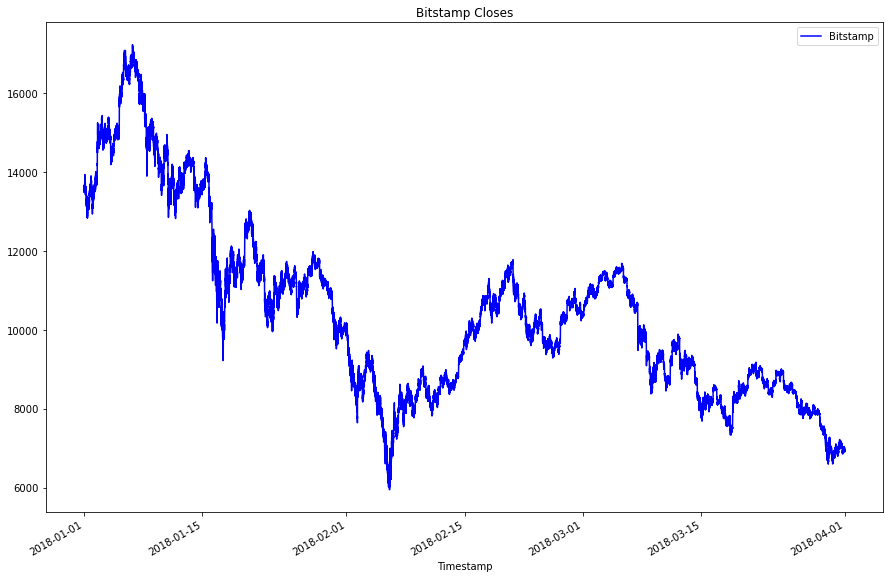

In [15]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp['Close'].plot(legend=True, figsize=(15, 10), title="Bitstamp Closes", color="blue", label="Bitstamp")

<AxesSubplot:title={'center':'Coinbase Closes'}, xlabel='Timestamp'>

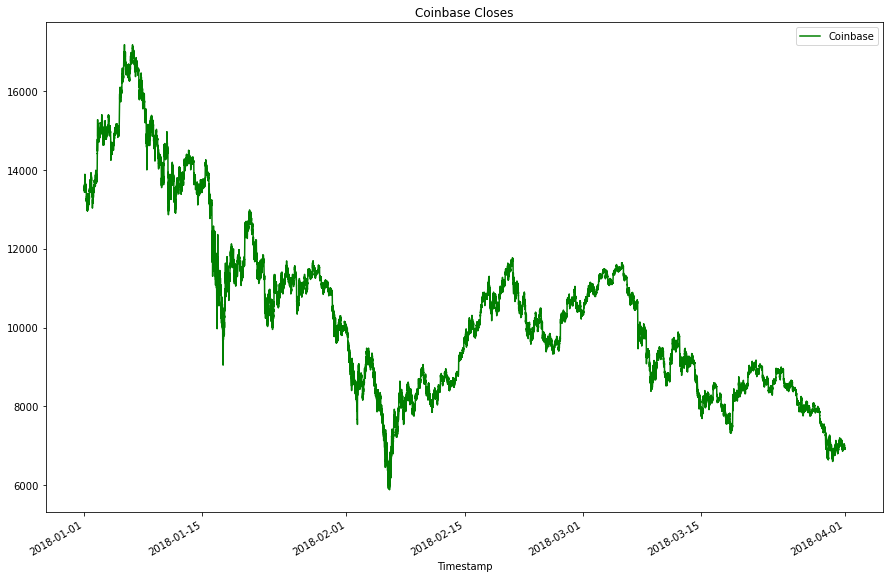

In [16]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase['Close'].plot(legend=True, figsize=(15, 10), title="Coinbase Closes", color="green", label="Coinbase")

<AxesSubplot:title={'center':'Bitstamp vs Coinbase Closes'}, xlabel='Timestamp'>

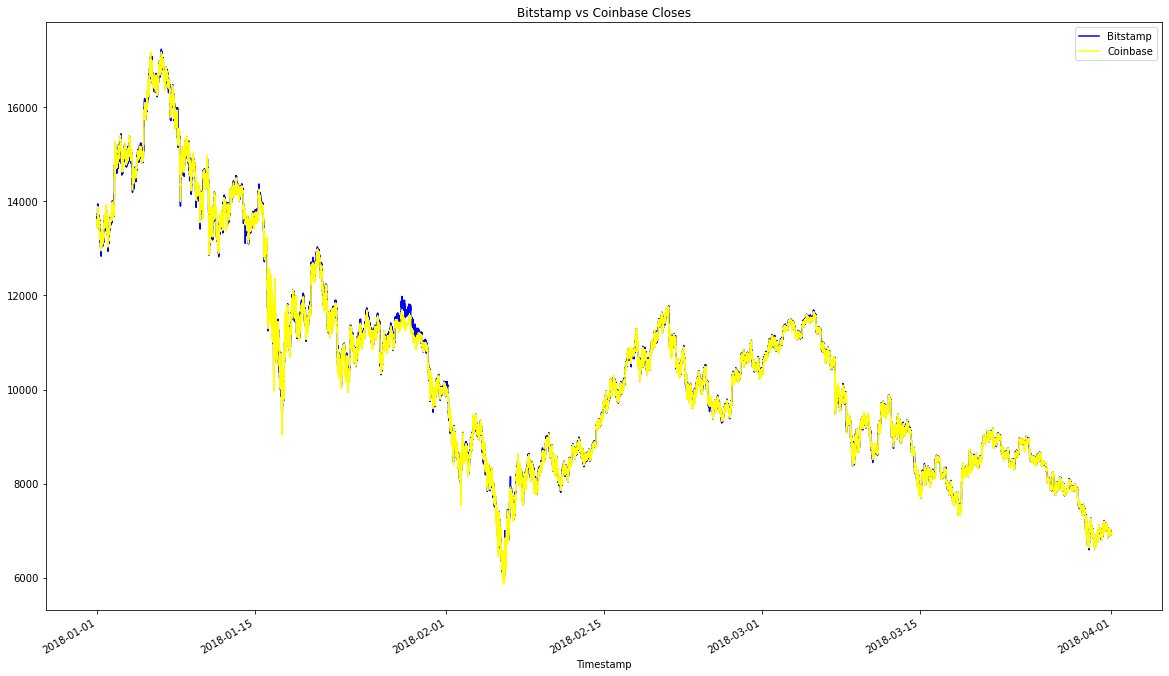

In [17]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp['Close'].plot(legend=True, figsize=(20, 12), title="Bitstamp vs Coinbase Closes", color="blue", label="Bitstamp")
coinbase['Close'].plot(legend=True, figsize=(20, 12), color="yellow", label="Coinbase")

<AxesSubplot:title={'center':'Bitstamp vs Coinbase Closes'}, xlabel='Timestamp'>

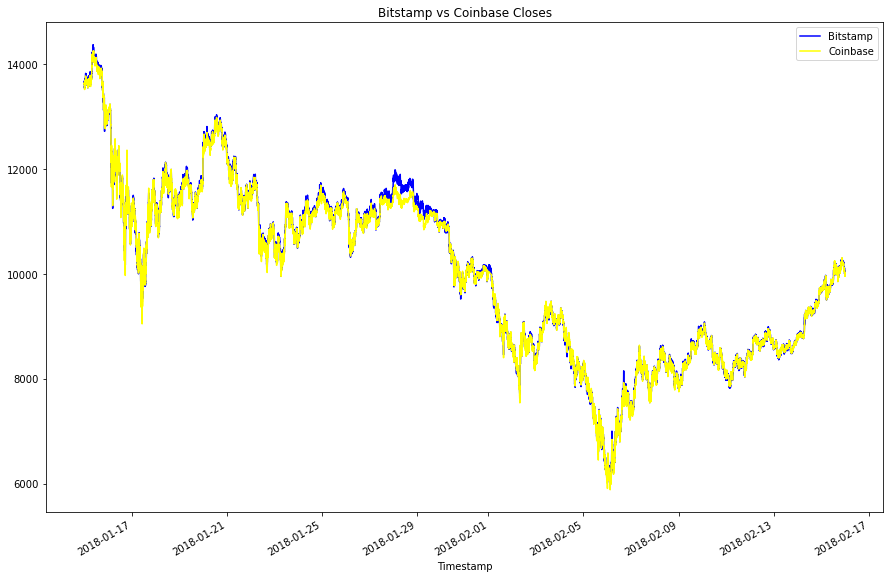

In [18]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
#Stripped out to look at just jan 15 through feb 15 of year 2018
bitstamp['Close'].loc['2018-01-15':'2018-02-15'].plot(legend=True, figsize=(15, 10), title="Bitstamp vs Coinbase Closes", color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-01-15':'2018-02-15'].plot(legend=True, figsize=(15, 10), color="yellow", label="Coinbase")

<AxesSubplot:title={'center':'Bitstamp vs Coinbase Closes'}, xlabel='Timestamp'>

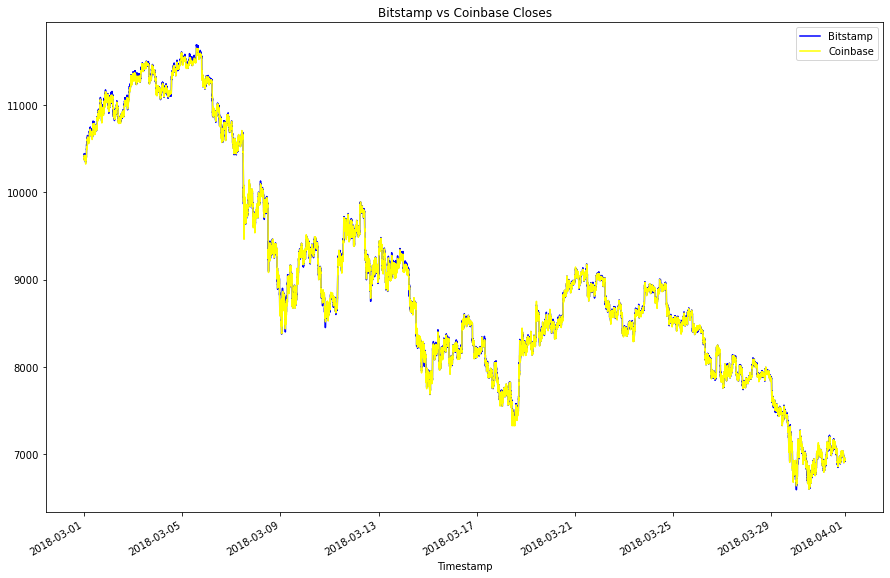

In [19]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
#Looks at month of March data from 2018

bitstamp['Close'].loc['2018-03-01':'2018-04-01'].plot(legend=True, figsize=(15, 10), title="Bitstamp vs Coinbase Closes", color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-03-01':'2018-04-01'].plot(legend=True, figsize=(15, 10), color="yellow", label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer**  Looks like early on in Feb we had a definite difference in prices as compared to in the last month of the data. Something must have happened for the closes to be more inline more consistently as time went on.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Bitstamp vs Coinbase Closes'}, xlabel='Timestamp'>

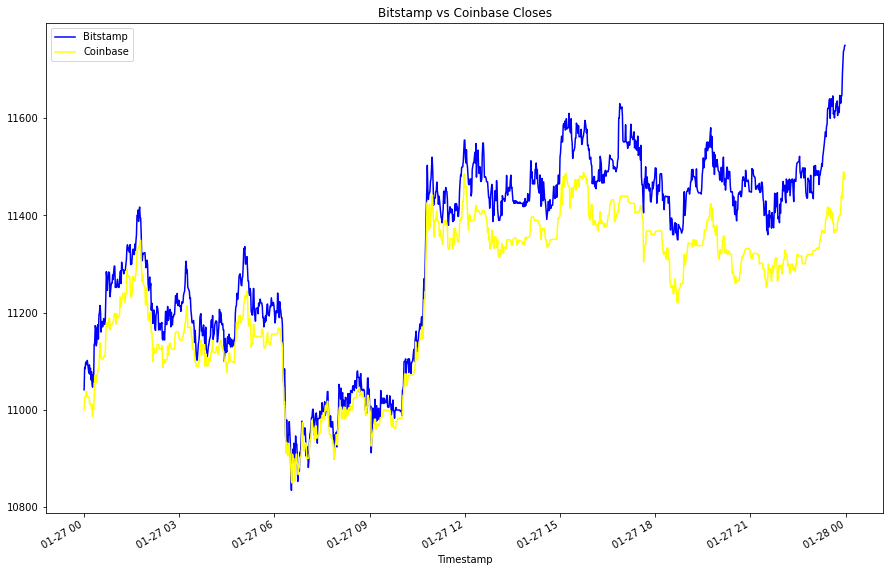

In [20]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
#selecting Jan 27, 2018 as first day to visualize
bitstamp['Close'].loc['2018-01-27':'2018-01-27'].plot(legend=True, figsize=(15, 10), title="Bitstamp vs Coinbase Closes", color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-01-27':'2018-01-27'].plot(legend=True, figsize=(15, 10), color="yellow", label="Coinbase")

In [21]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitstamp['Close'].loc['2018-01-27'] - coinbase['Close'].loc['2018-01-27']

# Generate summary statistics for the early DataFrame
display(arbitrage_spread_early.describe())

count    1421.000000
mean       84.558600
std        51.823073
min       -35.950000
25%        47.430000
50%        75.940000
75%       116.180000
max       275.380000
Name: Close, dtype: float64

<AxesSubplot:>

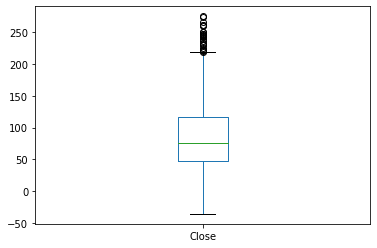

In [22]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box')

<AxesSubplot:title={'center':'Bitstamp vs Coinbase Closes'}, xlabel='Timestamp'>

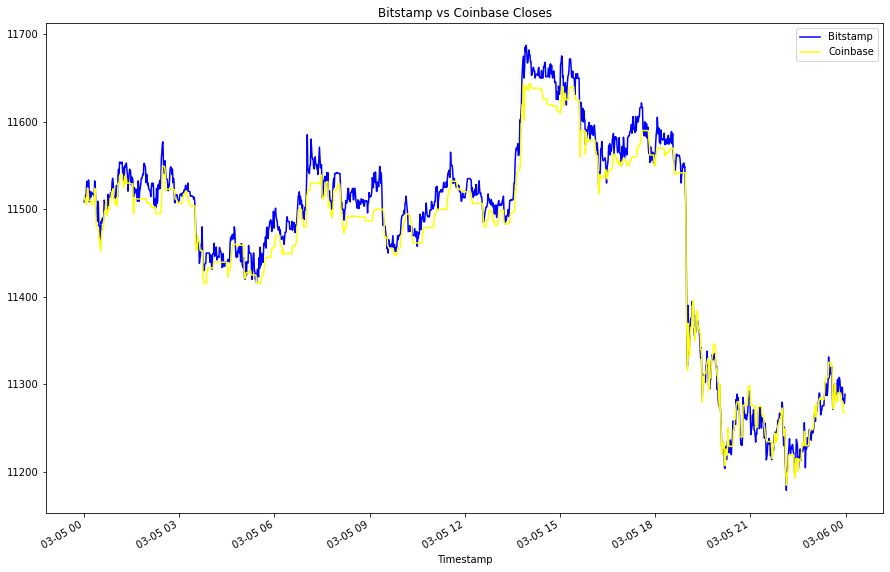

In [23]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2018-03-05':'2018-03-05'].plot(legend=True, figsize=(15, 10), title="Bitstamp vs Coinbase Closes", color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-03-05':'2018-03-05'].plot(legend=True, figsize=(15, 10), color="yellow", label="Coinbase")

In [24]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
#Looking at Feb 28, 2018
arbitrage_spread_middle = bitstamp['Close'].loc['2018-03-05'] - coinbase['Close'].loc['2018-03-05']

# Generate summary statistics 
display(arbitrage_spread_middle.describe())

count    1437.000000
mean       11.817683
std        14.276780
min       -33.180000
25%         2.940000
50%        11.500000
75%        20.470000
max        68.280000
Name: Close, dtype: float64

<AxesSubplot:>

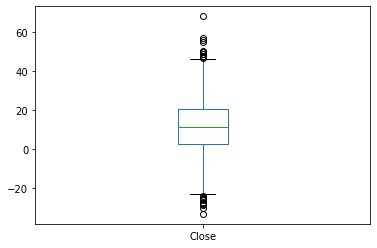

In [25]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box')

<AxesSubplot:title={'center':'Bitstamp vs Coinbase Closes'}, xlabel='Timestamp'>

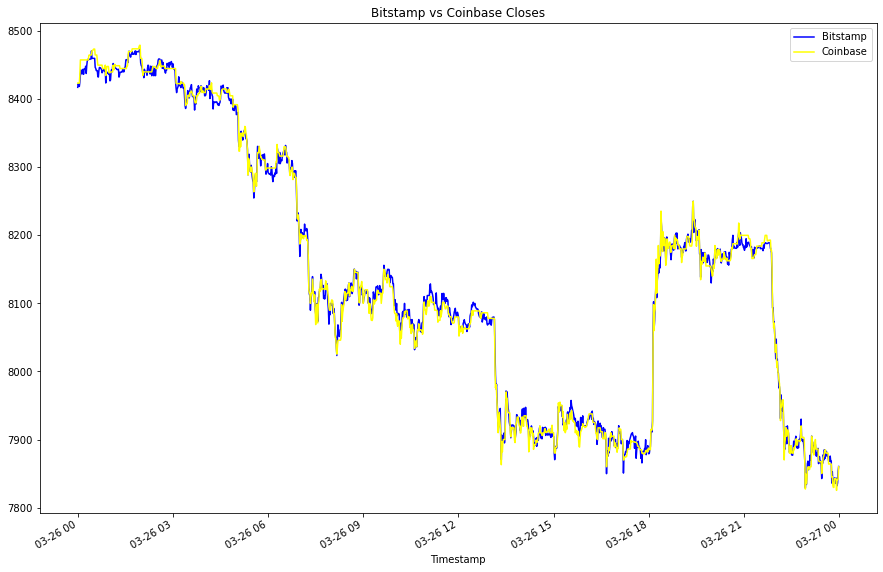

In [26]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2018-03-26':'2018-03-26'].plot(legend=True, figsize=(15, 10), title="Bitstamp vs Coinbase Closes", color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-03-26':'2018-03-26'].plot(legend=True, figsize=(15, 10), color="yellow", label="Coinbase")

In [27]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
#March 27, 2018
arbitrage_spread_late =  bitstamp['Close'].loc['2018-03-26'] - coinbase['Close'].loc['2018-03-26']

# Generate summary statistics 
display(arbitrage_spread_late.describe())

count    1432.000000
mean        0.722193
std         8.523060
min       -35.070000
25%        -4.965000
50%         0.730000
75%         6.812500
max        32.040000
Name: Close, dtype: float64

<AxesSubplot:>

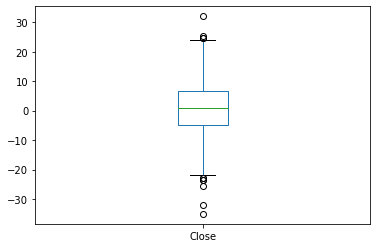

In [28]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [29]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
#arbitrage_spread_early = bitstamp['Close'].loc['2018-01-27'] - coinbase['Close'].loc['2018-01-27']
#arbitrage_spread_early = arbitrage_spread_early / coinbase['Close'].loc['2018-01-27']
arbitrage_spread_early = arbitrage_spread_early[arbitrage_spread_early > 0]
arbitrage_spread_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0]
arbitrage_spread_late= arbitrage_spread_late[arbitrage_spread_late > 0]

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
#profitable_trades_early = arbitrage_spread_early[arbitrage_spread_early > 0]
#profitable_trades_early.describe()
display(arbitrage_spread_early.describe())
display(arbitrage_spread_middle.describe())
display(arbitrage_spread_late.describe())

count    1396.000000
mean       86.261082
std        50.670518
min         0.180000
25%        49.407500
50%        76.850000
75%       117.845000
max       275.380000
Name: Close, dtype: float64

count    1155.000000
mean       16.740208
std        10.860019
min         0.020000
25%         8.880000
50%        14.790000
75%        23.195000
max        68.280000
Name: Close, dtype: float64

count    772.000000
mean       6.980415
std        5.106336
min        0.010000
25%        2.967500
50%        6.285000
75%        9.915000
max       32.040000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [30]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= (arbitrage_spread_early / coinbase['Close'].loc['2018-01-27']) *1
spread_return_middle= (arbitrage_spread_middle / coinbase['Close'].loc['2018-03-05']) * 1
spread_return_late= (arbitrage_spread_late / coinbase['Close'].loc['2018-03-26']) * 1

# Review the spread return DataFrame
display(spread_return_early.describe())
display(spread_return_middle.describe())
display(spread_return_late.describe())

count    1396.000000
mean        0.007633
std         0.004439
min         0.000016
25%         0.004410
50%         0.006810
75%         0.010352
max         0.023999
Name: Close, dtype: float64

count    1155.000000
mean        0.001455
std         0.000940
min         0.000002
25%         0.000772
50%         0.001288
75%         0.002023
max         0.005929
Name: Close, dtype: float64

count    772.000000
mean       0.000865
std        0.000636
min        0.000001
25%        0.000365
50%        0.000782
75%        0.001224
max        0.003980
Name: Close, dtype: float64

###3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the ###number #of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [31]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > 0.01]
profitable_trades_middle = spread_return_middle[spread_return_middle > 0.01]
profitable_trades_late = spread_return_late[spread_return_late > 0.01]


# Review the first five profitable trades
display(profitable_trades_early.head())
display(profitable_trades_middle.head())
display(profitable_trades_late.head())


Timestamp
2018-01-27 00:19:00    0.010039
2018-01-27 03:12:00    0.010372
2018-01-27 12:16:00    0.010346
2018-01-27 12:17:00    0.010271
2018-01-27 12:18:00    0.011292
Name: Close, dtype: float64

Series([], Name: Close, dtype: float64)

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [32]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
display(profitable_trades_early.describe())
display(profitable_trades_middle.describe())
display(profitable_trades_late.describe())

count    382.000000
mean       0.013429
std        0.002947
min        0.010006
25%        0.011299
50%        0.012674
75%        0.014792
max        0.023999
Name: Close, dtype: float64

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [33]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * coinbase['Close'].loc['2018-01-27']
profit_middle = profitable_trades_middle * coinbase['Close'].loc['2018-02-28']
profit_late = profitable_trades_late * coinbase['Close'].loc['2018-03-26']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()
profit_per_trade_middle = profit_middle.dropna()
profit_per_trade_late = profit_late.dropna()


# View the early profit DataFrame
display(profit_per_trade_early.head())
display(profit_per_trade_middle.head())
display(profit_per_trade_late.head())

Timestamp
2018-01-27 00:19:00    110.68
2018-01-27 03:12:00    115.97
2018-01-27 12:16:00    117.84
2018-01-27 12:17:00    117.00
2018-01-27 12:18:00    128.63
Name: Close, dtype: float64

Series([], Name: Close, dtype: float64)

Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [34]:
# Generate the summary statistics for the early profit per trade DataFrame
display(profit_per_trade_early.describe())
display(profit_per_trade_middle.describe())
display(profit_per_trade_late.describe())

count    382.000000
mean     152.383927
std       33.701052
min      110.680000
25%      128.072500
50%      143.640000
75%      168.005000
max      275.380000
Name: Close, dtype: float64

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:xlabel='Timestamp'>

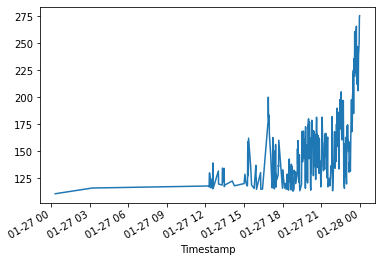

In [35]:
# Plot the results for the early profit per trade DataFrame
display(profit_per_trade_early.plot())
#display(profit_per_trade_middle.plot())
#display(profit_per_trade_late.plot())

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [36]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_early = profit_per_trade_early.sum()
profit_middle = profit_per_trade_middle.sum()
profit_late = profit_per_trade_late.sum()

profit_early, profit_middle, profit_late

(58210.65999999999, 0.0, 0.0)

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [37]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_middle = profit_per_trade_middle.cumsum()
cumulative_profit_late = profit_per_trade_late.cumsum()

<AxesSubplot:xlabel='Timestamp'>

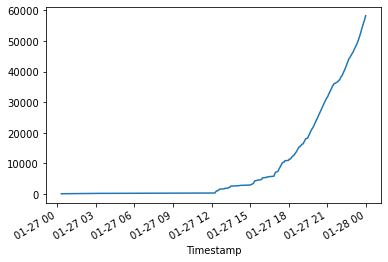

In [38]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot()

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** I definitely see the most arbitrage opportunities early on in the data set.  From the above cumsum chart you can see we have a steady increase. I tried to pick a few dates and couldn't find anything that would give me results for the middle or later periods in the data set. By the time I filtered out profit of greater than 1%, the dataframe was empty. Very interesting!  Seems maybe there is something to the efficient market hypothesis afterall.